In [16]:
import cv2


In [17]:
# Path to the Haar Cascade file
face_cascade_path = "C:/Users/Misha Gupta/AppData/Local/Programs/Python/Python310/Lib/site-packages/cv2/data/haarcascade_frontalface_default.xml"

# Load the Haar Cascade file
face_cascade = cv2.CascadeClassifier(face_cascade_path)

# Check if the Haar Cascade file was loaded correctly
if face_cascade.empty():
    raise IOError("Unable to load the face cascade classifier xml file.")

# Start video capture
video_cap = cv2.VideoCapture(0)

# Check if the video capture is opened correctly
if not video_cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret, video_data = video_cap.read()
    if not ret:
        break

    # Convert to grayscale
    gray = cv2.cvtColor(video_data, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30),
        flags=cv2.CASCADE_SCALE_IMAGE
    )

    # Draw rectangles around the detected faces
    for (x, y, w, h) in faces:
        cv2.rectangle(video_data, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Display the video feed with rectangles
    cv2.imshow("video_live", video_data)

    # Break the loop if the 'a' key is pressed
    if cv2.waitKey(10) == ord('a'):
        break

# Release the video capture object and close all OpenCV windows
video_cap.release()
cv2.destroyAllWindows()

In [18]:
def preprocess_image(image_path, face_cascade):
    # Read the image
    image = cv2.imread(image_path)
    
    # Check if the image was successfully loaded
    if image is None:
        raise ValueError(f"Error: The image at {image_path} could not be read.")
    
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30), flags=cv2.CASCADE_SCALE_IMAGE)
    
    # Crop and resize faces
    face_images = []
    for (x, y, w, h) in faces:
        face = gray[y:y+h, x:x+w]
        face = cv2.resize(face, (224, 224))  # Resize to 224x224 pixels
        face_images.append(face)
    
    return face_images

# Load the Haar cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Example usage
try:
    preprocessed_faces = preprocess_image('C:/Users/Misha Gupta/Downloads/archive (5)/train/n000043/0001_01.jpg', face_cascade)
    print(f"Number of faces detected: {len(preprocessed_faces)}")
except ValueError as e:
    print(e)


Number of faces detected: 1


In [20]:
import numpy as np
import os
import tensorflow as tf
import spicy


In [5]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load pre-trained VGG16 model + higher-level layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
for layer in base_model.layers:
    layer.trainable = False

# Update num_classes to match your dataset
num_classes = 4  # Ensure this matches the number of classes in your dataset

# Add custom layers on top
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Model definition
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

train_dir = 'C:/Users/Misha Gupta/Downloads/archive (5)/train/'
val_dir = 'C:/Users/Misha Gupta/Downloads/archive (5)/val/'

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')
val_generator = val_datagen.flow_from_directory(val_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')

# Train the model
history = model.fit(train_generator, epochs=10, validation_data=val_generator)

# Save the model
model.save('face_recognition_model.h5')

Found 1716 images belonging to 4 classes.
Found 1461 images belonging to 4 classes.
Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 210s 4s/step - accuracy: 0.4936 - loss: 2.3249 - val_accuracy: 0.2683 - val_loss: 2.0745
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 207s 4s/step - accuracy: 0.8497 - loss: 0.4149 - val_accuracy: 0.2546 - val_loss: 2.5321
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 224s 4s/step - accuracy: 0.8781 - loss: 0.3228 - val_accuracy: 0.2177 - val_loss: 3.0574
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 231s 4s/step - accuracy: 0.8810 - loss: 0.3279 - val_accuracy: 0.2772 - val_loss: 2.9448
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 225s 4s/step - accuracy: 0.9220 - loss: 0.2225 - val_accuracy: 0.2348 - val_loss: 3.3739
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 225s 4s/step - accuracy: 0.9319 - loss: 0.2186 - val_accuracy: 0.2149 - val_loss: 3.6862
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 228s 4s/step - accuracy: 0.9453 - loss: 0.1463 - val_accuracy: 0.1869 - val_loss: 4.2535
Epoch 8/10
54/54 ━━━━━━━━━━

In [7]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Evaluate the model on the validation data
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_accuracy}")

# Predict the classes for the validation data
Y_pred = model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Get the true classes
y_true = val_generator.classes

# Calculate precision, recall, and F1-score
print('Classification Report')
print(classification_report(y_true, y_pred, target_names=val_generator.class_indices.keys()))


46/46 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.1929 - loss: 5.5928
Validation Accuracy: 0.19233401119709015
46/46 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step
Classification Report
              precision    recall  f1-score   support

     n000854       0.29      0.06      0.09       477
     n001197       0.12      0.73      0.21       182
     n001199       0.29      0.17      0.22       423
     n001211       0.21      0.02      0.03       379

    accuracy                           0.16      1461
   macro avg       0.23      0.24      0.14      1461
weighted avg       0.25      0.16      0.13      1461



ModuleNotFoundError: No module named 'seaborn'

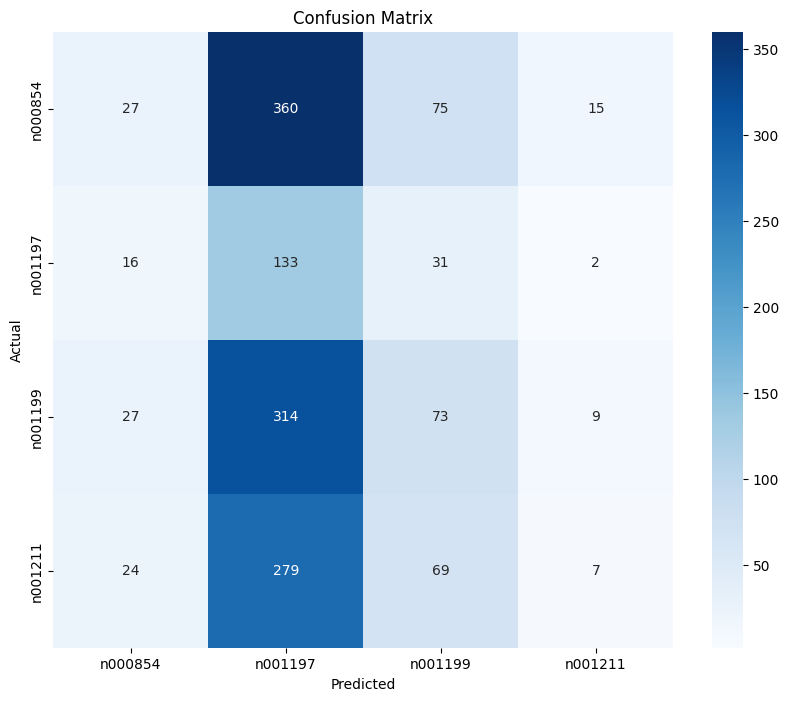

In [8]:
# Optional: Plot the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=val_generator.class_indices.keys(), yticklabels=val_generator.class_indices.keys())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
